# Dataset load
### Data Loading and Initial Exploration

**What I did:**  
Loaded the dataset `HouseTS.csv` and displayed the basic structure using `df.info()` and `df.head()`.

**Why I did it:**  
To understand the number of entries, data types, and basic structure of the dataset.

**Observations:**  
- The dataset contains numerical and date columns.
- Some columns have missing values.

**Decisions taken:**  
None at this stage. This step is for basic orientation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/HouseTS.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884092 entries, 0 to 884091
Data columns (total 39 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          884092 non-null  object 
 1   median_sale_price             884092 non-null  float64
 2   median_list_price             884092 non-null  float64
 3   median_ppsf                   884092 non-null  float64
 4   median_list_ppsf              884092 non-null  float64
 5   homes_sold                    884092 non-null  float64
 6   pending_sales                 884092 non-null  float64
 7   new_listings                  884092 non-null  float64
 8   inventory                     884092 non-null  float64
 9   median_dom                    884092 non-null  float64
 10  avg_sale_to_list              884092 non-null  float64
 11  sold_above_list               884092 non-null  float64
 12  off_market_in_two_weeks       884092 non-nul

,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,...,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full
0,2012-03-31,46550.0,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,59.5,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,Atlanta-Sandy Springs-Alpharetta
1,2012-04-30,61870.0,245000.0,40.723982,130.528256,22.0,29.0,56.0,69.0,89.5,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,202421.064584,Atlanta-Sandy Springs-Alpharetta
2,2012-05-31,125500.0,217450.0,63.913043,119.919216,24.0,40.0,63.0,60.0,144.5,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,202681.309539,Atlanta-Sandy Springs-Alpharetta
3,2012-06-30,153000.0,189900.0,81.598080,105.617353,34.0,46.0,50.0,57.0,126.0,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,202998.603897,Atlanta-Sandy Springs-Alpharetta
4,2012-07-31,165500.0,154000.0,81.598080,83.921175,39.0,49.0,42.0,50.0,80.0,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,203781.903446,Atlanta-Sandy Springs-Alpharetta


# Missing values Analysis
###  Missing Values Analysis

**What I did:**  
Checked for missing values using `isna().sum()` and visualized them using a heatmap.

**Why I did it:**  
To identify which columns contain missing data and the extent of those missing values.

**Observations:**  
- `Per Capita Income` and `Total Housing Units` have some missing entries.

**Decisions taken:**  
Proceed to handle missing values in the next step.


date                            0
Total Housing Units             0
school                          0
station                         0
supermarket                     0
Total Population                0
Median Age                      0
Per Capita Income               0
Total Families Below Poverty    0
Median Rent                     0
dtype: int64


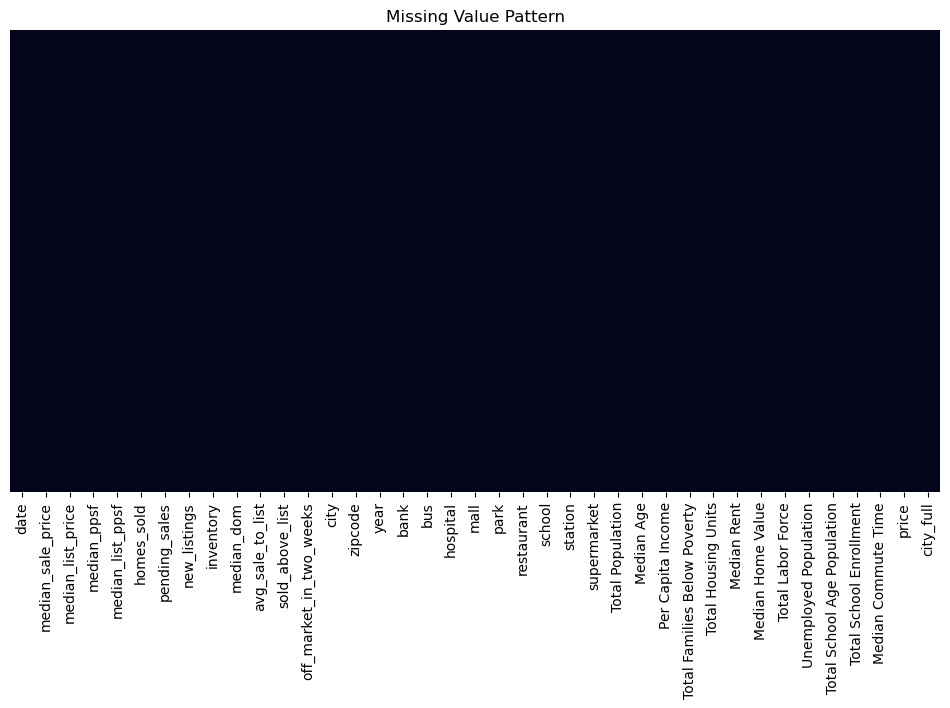

In [3]:
missing = df.isna().sum().sort_values(ascending=False)
print(missing.head(10))

plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False, yticklabels=False)
plt.title('Missing Value Pattern')
plt.show()

# Date and time conversion
###  Date Conversion and Feature Extraction

**What I did:**  
Converted the `year` column to datetime format and extracted new features like `year_num`, `month`, and `quarter`.

**Why I did it:**  
To make time-based patterns in the data more accessible for analysis or modeling.

**Observations:**  
- Dates are now in proper datetime format.
- Time-based features will help analyze seasonality.

**Decisions taken:**  
Kept original date column but added separate derived columns.


In [4]:
df['year'] = pd.to_datetime(df['year'])

# Data Distribution and Summary sets
### Data Distribution Analysis

**What I did:**  
Plotted histograms and KDE plots for numerical columns.

**Why I did it:**  
To check the spread and skewness of numerical features.

**Observations:**  
- `price` and `Per Capita Income` are right-skewed.
- Some values appear as extreme outliers.

**Decisions taken:**  
Consider removing or capping outliers in the next step.


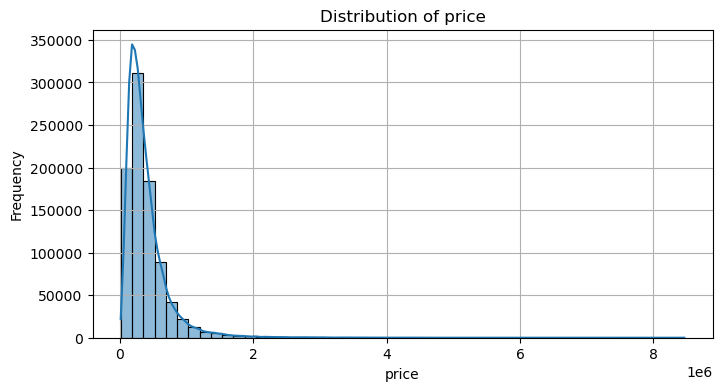

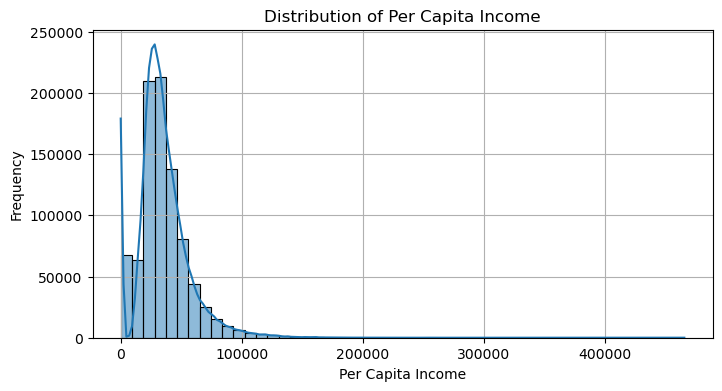

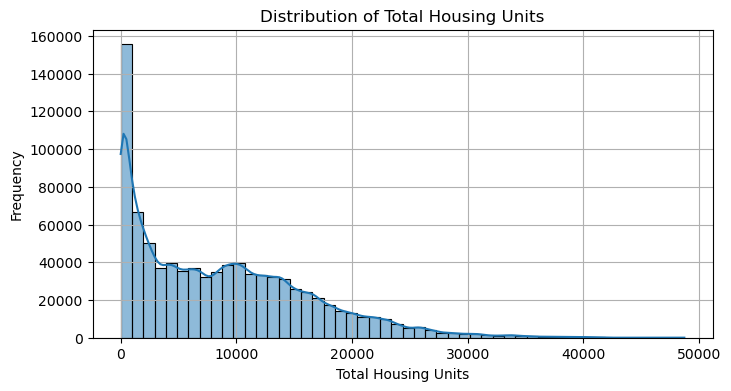

In [5]:
num_cols = ['price', 'Per Capita Income', 'Total Housing Units']

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Boxplot for outlier

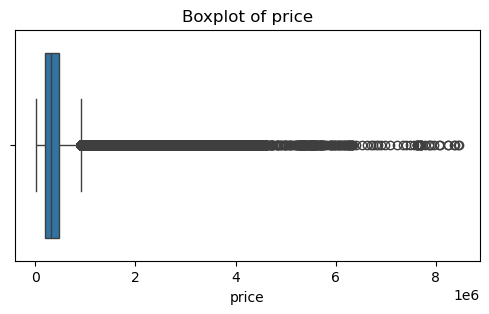

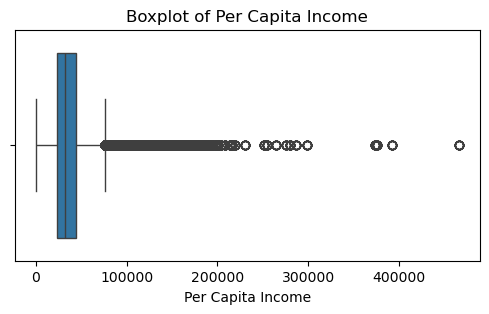

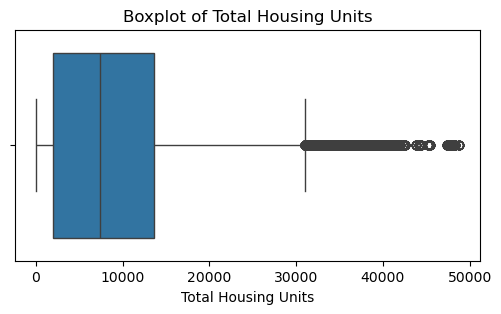

In [6]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Data Cleaning and Filling missing values

In [8]:
df['Per Capita Income'] = df['Per Capita Income'].fillna(df['Per Capita Income'].median())
df['Total Housing Units'] = df['Total Housing Units'].fillna(df['Total Housing Units'].median())

#  Handle Outliers
### Outlier Detection and Handling

**What I did:**  
Used boxplots to visualize outliers and removed values beyond the 99th percentile.

**Why I did it:**  
Extreme values can distort analysis and degrade model performance.

**Observations:**  
- Outliers are present in `price` and `Total Housing Units`.
- Removing top 1% values helped reduce skew.

**Decisions taken:**  
Trimmed outliers to improve model readiness.


In [9]:
for col in num_cols:
    upper_limit = df[col].quantile(0.99)
    df = df[df[col] < upper_limit]

# Date Based Feature Engineering

In [11]:
df['year_num'] = df['year'].dt.year
df['month'] = df['year'].dt.month
df['quarter'] = df['year'].dt.quarter

# Custom Feature Engineering
### Feature Engineering

**What I did:**  
Created new features: `price_per_unit` and `income_to_price_ratio`.

**Why I did it:**  
These features may capture relationships that are more informative than the raw values alone.

**Observations:**  
- `price_per_unit` gives an idea of housing density.
- `income_to_price_ratio` reflects affordability.

**Decisions taken:**  
Kept both new features for use in further analysis or modeling.


In [12]:
df['price_per_unit'] = df['price'] / df['Total Housing Units']
df['income_to_price_ratio'] = df['Per Capita Income'] / df['price']

# Scaling/Normalization (for ML readiness)
###  Feature Scaling

**What I did:**  
Standardized numerical features using `StandardScaler`.

**Why I did it:**  
To ensure features have the same scale, which is important for many ML models (e.g., KNN, Logistic Regression).

**Observations:**  
- All selected numerical features are now centered and scaled.

**Decisions taken:**  
Applied scaling to `price`, `Per Capita Income`, and `Total Housing Units`.


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Conclusion
--Handled missing values by filling numeric columns with the median to preserve data while minimizing skew.

--Detected and removed outliers using percentile-based filtering to improve data quality.

--Extracted date-based features like year, month, and quarter to support time-related analysis.

--Engineered new features such as price_per_unit and income_to_price_ratio for deeper insights.

--Standardized numerical features to ensure consistency and model compatibility during future analysis.
